In [1]:
import pandas as pd
import sqlite3

In [2]:
db_con = sqlite3.connect('../checking-logs.sqlite.sqlite')

In [3]:
query = '''
SELECT datetime from pageviews
WHERE uid LIKE 'user_%'
'''
visits = pd.io.sql.read_sql(query, db_con)
visits

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [4]:
dt = pd.to_datetime(visits['datetime']).dt.date
dt

0      2020-04-17
1      2020-04-18
2      2020-04-18
3      2020-04-18
4      2020-04-18
          ...    
982    2020-05-21
983    2020-05-21
984    2020-05-21
985    2020-05-22
986    2020-05-22
Name: datetime, Length: 987, dtype: object

In [5]:
dt_df = pd.DataFrame(dt)
visits = pd.DataFrame(dt_df.groupby('datetime')['datetime'].count())
visits.index.name = 'date'
visits.rename(columns={'datetime':'views'}, inplace=True)
visits

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


<AxesSubplot:title={'center':'Views per day'}, xlabel='date'>

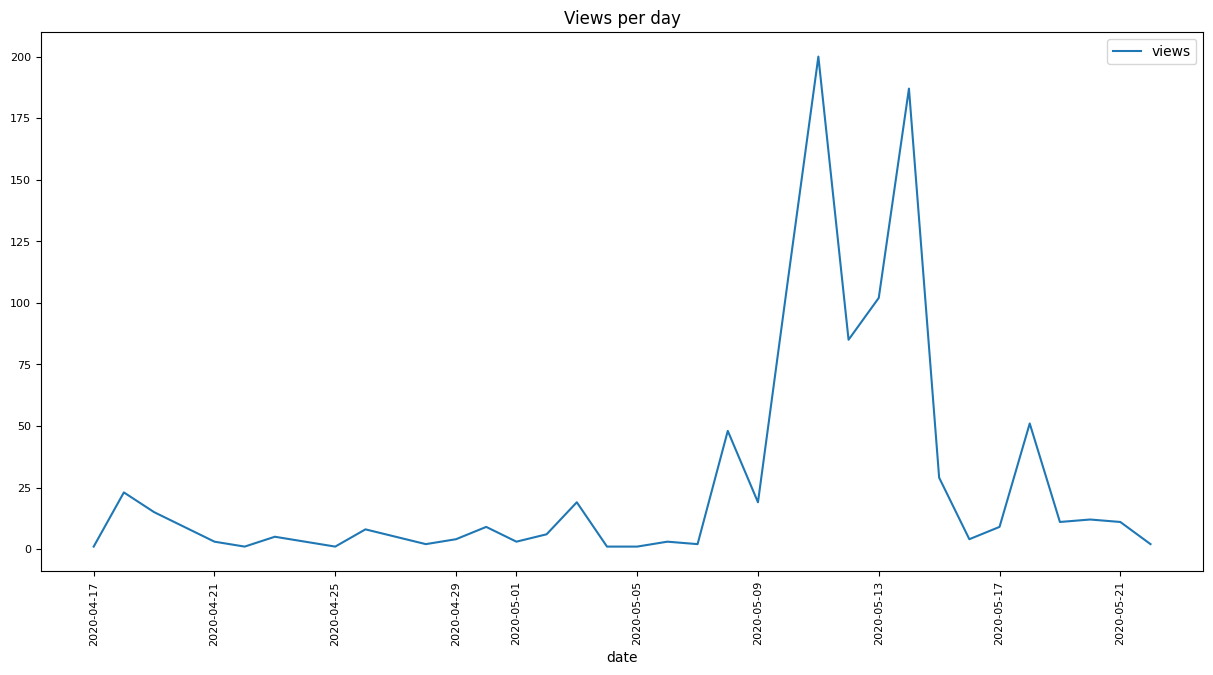

In [12]:
visits.plot(fontsize=8, figsize=(15,7), title='Views per day', rot=90)

In [7]:
db_con.close()